In [109]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import sys, os
sys.path.insert(0, os.path.abspath('../'))
import footyviz

# Loading Data



In [110]:
data = pd.read_csv('../datasets/positional_data/liverpool_2019.csv', index_col=('play', 'frame'))
data.tail()


Unnamed: 0 bgcolor   dx   dy edgecolor  \
play                        frame                                           
Leicester 0 - [3] Liverpool 120          2745    blue  0.0  0.0     white   
                            121          2746    blue  0.0  0.0     white   
                            122          2747    blue  0.0  0.0     white   
                            123          2748    blue  0.0  0.0     white   
                            124          2749    blue  0.0  0.0     white   

                                   player  player_num     team          x  \
play                        frame                                           
Leicester 0 - [3] Liverpool 120     10267         NaN  defense  98.724826   
                            121     10267         NaN  defense  98.724826   
                            122     10267         NaN  defense  98.724826   
                            123     10267         NaN  defense  98.724826   
                            124     10267         NaN  defense  98.724826   

                                           y    z  
play                        frame                  
Leicester 0 - [3] Liverpool 120    53.720353  0.0  
                            121    53.720353  0.0  
                            122    53.720353  0.0  
                            123    53.720353  0.0  
                            124    53.720353  0.0

In [111]:
#list of goals included in the dataset
data.index.get_level_values('play').unique()

Index(['Liverpool [3] - 0 Bournemouth', 'Bayern 0 - [1] Liverpool',
       'Fulham 0 - [1] Liverpool', 'Southampton 1 - [2] Liverpool',
       'Liverpool [2] - 0 Porto', 'Porto 0 - [2] Liverpool',
       'Liverpool [4] - 0 Barcelona', 'Liverpool [1] - 0 Wolves',
       'Liverpool [3] - 0 Norwich', 'Liverpool [2] - 1 Chelsea',
       'Liverpool [2] - 1 Newcastle', 'Liverpool [2] - 0 Salzburg',
       'Genk 0 - [3] Liverpool', 'Liverpool [2] - 0 Man City',
       'Liverpool [1] - 0 Everton', 'Liverpool [2] - 0 Everton',
       'Bournemouth 0 - 3 Liverpool', 'Liverpool [1] - 0 Watford',
       'Leicester 0 - [3] Liverpool'],
      dtype='object', name='play')

In [112]:
#this is what I used to visualize their vertical style of play

def calculate_packing(game, startFrame, endFrame):
    players = []
    ball_start = [game[game['player'] == 0].loc[startFrame,'x'],game[game['player'] == 0].loc[startFrame,'y']]
    ball_end = [game[game['player'] == 0].loc[endFrame,'x'],game[game['player'] == 0].loc[endFrame,'y']]
    df3 = game.copy()
    df3.set_index('player',inplace = True)
    for player in df3.index.get_level_values('player').unique():  
        filt = (game['player'] == player)
        playerstart = game[filt].loc[startFrame,'x']
        playerend = game[filt].loc[endFrame,'x']
        if game[filt].loc[startFrame,'team'] == 'defense':
            if ((playerstart > ball_start[0] and playerend < ball_end[0]) or (playerstart < ball_start[0] and playerend > ball_end[0])):
    
                players.append(player)#([game[filt].loc[startFrame,'x'],game[filt].loc[startFrame,'y']])
    return players, ball_start, ball_end

def add_packing_to_frame(fig, axes, game, startFrame, endFrame):
    players, ball_start, ball_end = calculate_packing(game, startFrame, endFrame)
    axes.add_line(plt.Line2D([ball_start[0], ball_start[0]], [100, 0],
                    c='r'))
    axes.add_line(plt.Line2D([ball_end[0], ball_end[0]], [100, 0],
                    c='r'))
    axes.arrow(ball_start[0], ball_start[1], ball_end[0] - ball_start[0], ball_end[1] - ball_start[1], head_width=1, head_length=2, fc='k', ec='k')
    axes.text(40,105, str(len(players)) + " defenders taken out",fontsize = 16)
    return fig, axes





play = 'Genk 0 - [3] Liverpool'
df = data.loc[play]
df2 = calculate_packing(df,120,160)
print(df2)
df3 = df.copy()
df3.set_index('player',inplace = True)
df3.index.get_level_values('player').unique()
df3


([1634, 4777], [81.65123885580348, 30.402697785463644], [96.72225593289406, 48.102865155857856])


,Unnamed: 0,bgcolor,dx,dy,edgecolor,player_num,team,x,y,z
player,,,,,,,,,,
0,0,NaN,0.000000,0.000000,NaN,NaN,NaN,53.681930,2.109105,0.0
0,1,NaN,0.306820,0.248863,NaN,NaN,NaN,53.988750,2.357968,0.0
0,2,NaN,0.280467,0.227488,NaN,NaN,NaN,54.269217,2.585456,0.0
0,3,NaN,0.254115,0.206113,NaN,NaN,NaN,54.523331,2.791569,0.0
0,4,NaN,0.227762,0.184739,NaN,NaN,NaN,54.751093,2.976308,0.0
...,...,...,...,...,...,...,...,...,...,...
12853,4021,blue,0.000000,0.000000,white,NaN,defense,51.700680,41.176471,0.0
12853,4022,blue,0.000000,0.000000,white,NaN,defense,51.700680,41.176471,0.0
12853,4023,blue,0.000000,0.000000,white,NaN,defense,51.700680,41.176471,0.0


In [113]:
# this was provided by lastrow on twitter, it is what I used for the pass connection slide



def get_possession_df(df):
    #get a DataFrame for Ball position
    dfBall = df.reset_index()[df.reset_index().player==0].set_index('frame')[['x', 'y']]

    #temporary DataFrame with all player's position relative to the ball 
    dfTemp = df.reset_index().set_index('frame').join(dfBall, rsuffix='_ball')
    dfTemp = dfTemp[dfTemp.player!=0]
    dfTemp['dif_x'] = dfTemp['x'].sub(dfTemp['x_ball'])
    dfTemp['dif_y'] = (dfTemp['y'] - dfTemp['y_ball'])

    #DataFrame with all the frames where a player touches or has close control of the ball.
    dfPossession = dfTemp[((dfTemp[['dif_x', 'dif_y']]==0).sum(axis=1))==2].reset_index()
    dfPossession.player_num = dfPossession.player_num.astype('Int64')
    return dfPossession



def get_passes_df(dfPossession):
    #determining the start end enf of each possession block
    poss_start = dfPossession[dfPossession['player']!=dfPossession.shift(1)['player']]
    poss_end = dfPossession[dfPossession['player']!=dfPossession.shift(-1)['player']]

    #relevant columns to keep in the final DataFrame
    columns = ['team', 'x', 'y', 'frame', 'player_num']
    
    #list of all changes in possession
    dfPasses = pd.concat([poss_end.reset_index()[columns].rename(lambda x: 'from_{}'.format(x), axis='columns'),
                          poss_start.iloc[1:].reset_index()[columns].rename(lambda x: 'to_{}'.format(x), axis='columns')
                         ], axis='columns')

    #keep all changes in possession from players of the same team
    dfPasses = dfPasses[dfPasses['from_team']==dfPasses['to_team']]
    return dfPasses

def get_passes_from_play(data, play):
    df = data.loc[play]
    dfPossession = get_possession_df(df)
    dfPasses = get_passes_df(dfPossession)
    dfPasses['play'] = play
    return dfPasses


class pass_connection:
    count = 1
    def __init__(self, player1, player2):
        self.players = [player1, player2]

        
        
        
dfFull = pd.concat([get_passes_from_play(data, play) for play in data.index.get_level_values('play').unique()])
dfFull2 = dfFull.copy()
dfFull2.set_index(["from_player_num"],inplace = True)
liste = []
dfFull = dfFull.dropna()
for index,row in dfFull.iterrows():
        liste.append([row["from_player_num"],row["to_player_num"]])
        
    
    

unique_list = [] 
for x in liste: 
    x.sort()
for x in liste: 
    m = 0
    for z in unique_list: 
        if z == x:
            m = 1
    if m == 0:
        unique_list.append(x)
print(unique_list)
print(liste) 
for l in unique_list:
    if liste.count(l) > 1:
        print(l)
        print(" " +str(liste.count(l)) + "\n")
    
        




[[8, 10], [8, 9], [9, 11], [4, 10], [10, 26], [9, 10], [11, 14], [9, 14], [14, 66], [9, 66], [5, 9], [5, 66], [11, 66], [27, 66], [10, 66], [14, 26], [26, 66], [10, 11], [11, 26], [10, 20], [10, 27], [10, 23], [8, 11], [7, 66]]
[[8, 10], [8, 9], [9, 11], [4, 10], [10, 26], [9, 10], [9, 10], [11, 14], [9, 14], [14, 66], [9, 66], [5, 9], [5, 66], [11, 66], [27, 66], [10, 66], [14, 66], [14, 66], [10, 66], [14, 66], [27, 66], [9, 10], [9, 10], [9, 10], [14, 26], [11, 14], [11, 14], [14, 66], [26, 66], [5, 9], [9, 11], [10, 11], [26, 66], [11, 26], [10, 20], [10, 27], [10, 66], [10, 23], [8, 11], [9, 10], [10, 11], [7, 66], [9, 66]]
[9, 11]
 2

[9, 10]
 6

[11, 14]
 3

[14, 66]
 5

[9, 66]
 2

[5, 9]
 2

[27, 66]
 2

[10, 66]
 3

[26, 66]
 2

[10, 11]
 2



In [ ]:
#that is the code i ran to compare velocities

def calc_velocities(game,dt=0.05):
    game2 = game.copy()
    game2.set_index('player',inplace = True)
    attacking_team = []
    defending_team = []
    
    for player in game2.index.get_level_values('player').unique():  
        filt = (game['player'] == player)
        top_speed = 0
        player_num = game[filt].loc[1, 'player_num']
        sumup = 0
        i = 0
        for frame in game[filt].index.get_level_values('frame').unique():
            dx = (game[filt].loc[frame,'dx'] * 1.05) / dt
            dy = (game[filt].loc[frame,'dy'] * 0.68) / dt
            speed = np.sqrt( dx**2 + dy**2 )
            
            sumup = sumup + speed
            i = i+1
        avr = sumup / i
        if game[filt].loc[0,'team'] == 'defense':
            defending_team.append(avr)
            
            
        elif game[filt].loc[0,'team'] == 'attack':
            attacking_team.append(avr)
            
    
    return defending_team, attacking_team
avr1 = -2.640695312272015 #dont count the corner
avr2 = -2.5510708707535232 #dont count the corner



for game in data.index.get_level_values('play').unique():
    df = data.loc[game]
    score1,score2 = calc_velocities(df)
    print(max(score1))
    print(max(score2))
    print("\n")
    avr1 = avr1 + max(score1)
    avr2 = avr2 + max(score2)
    
print("final result defense: " + str(avr1/18))
print("final result attack: " + str(avr2/18))

    
    
       
        

        

6.523486488464061
6.962366837674854


4.813227394339292
4.88132254418165


5.093329215738005
5.980587086107086


6.526049701804428
6.743793349260875


3.8689267568983094
5.188038411868733


4.991333590078569
6.2249027674991035


2.640695312272015
2.5510708707535232


4.378723004646555
5.1194214062790655


3.1562613780147775
3.640371368135684


4.416923640180913
4.5932210844106764


4.812826746134935
5.440740730984265


4.681058214578471
6.217363665990857


5.21256474100048
5.354805463010651


5.504630304141952
6.696479413735342





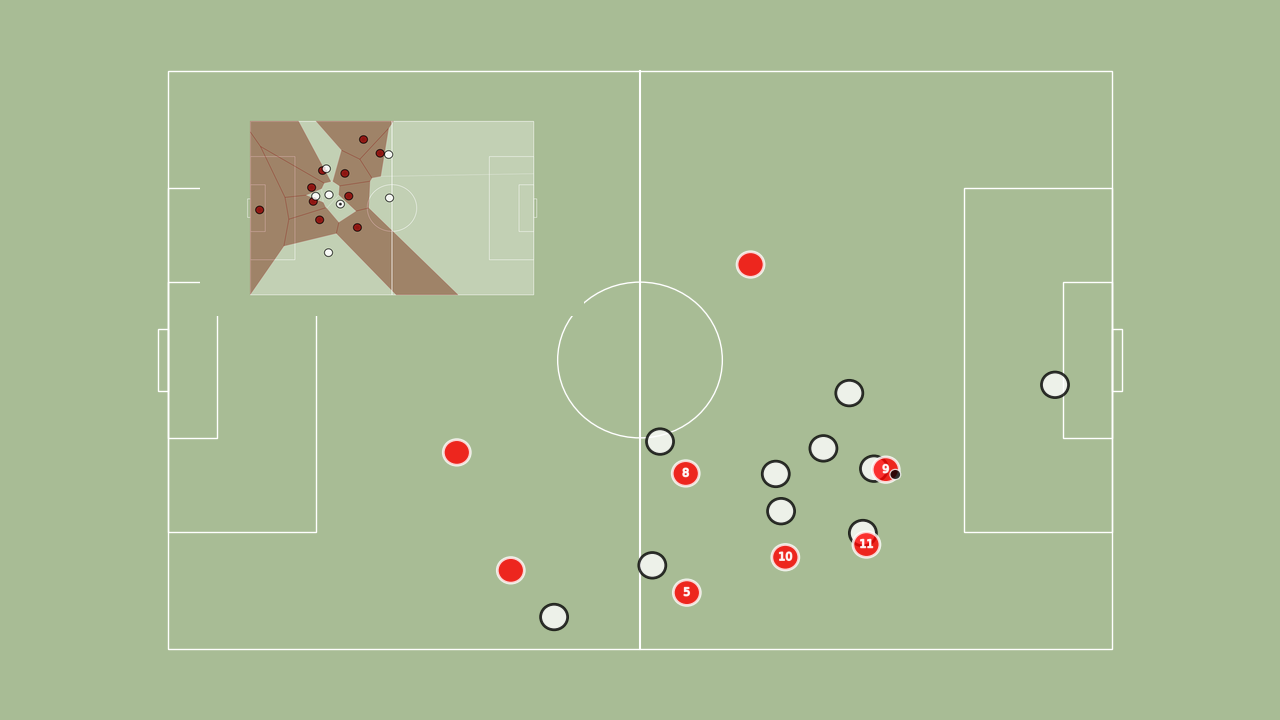